# Visión por Computadora I - 2025 - B3 - Trabajo práctico 1
**Inteligencia Artificial - CEIA - FIUBA**

## Autores

- **Mealla Pablo**.
- **Mendoza Dante**.
- **Vasquez Jorge**.
- **Viñas Gustavo**.

# 💻 TP1 - Parte 1 (imágenes en /white_patch)

1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
def white_patch(img: np.ndarray) -> tuple[np.ndarray, tuple[np.uint8, np.uint8, np.uint8]]:
    """
    Normaliza imagen con algoritmo white-patch

    Parameters
    ----------
    img: np.ndarray
        Imagen original
    
    Returns
    ------
    img: (numpy.ndarray)
        Imagen modificada con algoritmo aplicado
    """    
    if (img.ndim != 3):
        raise Exception("El array de imagen debe ser de 3 dimensiones.")
    
    # Obtenemos los máximos por canal
    max_vals = img.max(axis=(0, 1))

    # Aplicamos la corrección, convirtiendo a float por utilizar 255.0
    img_corrected = img * 255.0 / max_vals

    # Devolvemos la imagen normalizada, reconvertida a uint8
    return img_corrected.astype(np.uint8), max_vals

def show_images(imgOrig: np.ndarray, imgMod: np.ndarray, imgName: str, max_vals: tuple[np.uint8, np.uint8, np.uint8]) -> None:
    # Mostramos la imagen original vs corregida
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(imgOrig)
    axs[0].set_title(f"Original {imgName}. Max: (R: {max_vals[0]}, G: {max_vals[1]}, B: {max_vals[2]})")
    axs[0].axis("off")

    axs[1].imshow(imgMod)
    axs[1].set_title(f"White Patch {imgName}")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

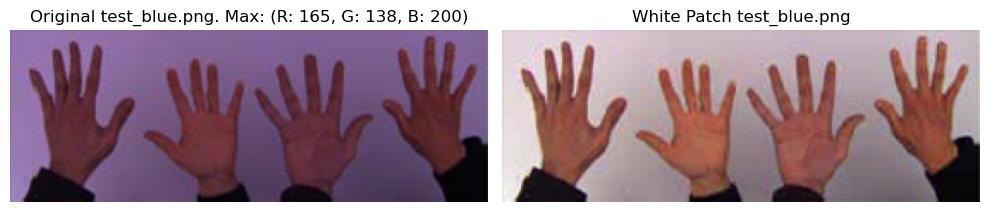

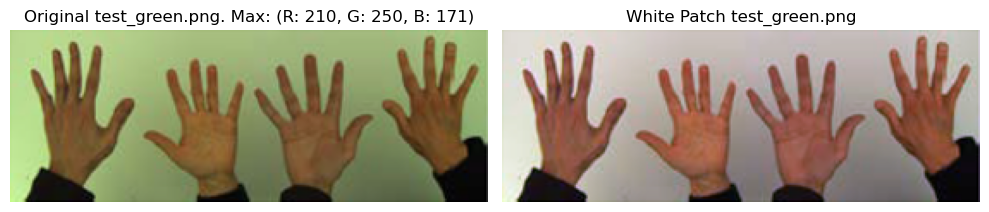

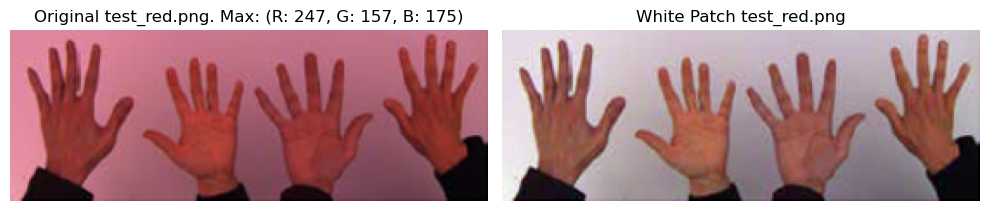

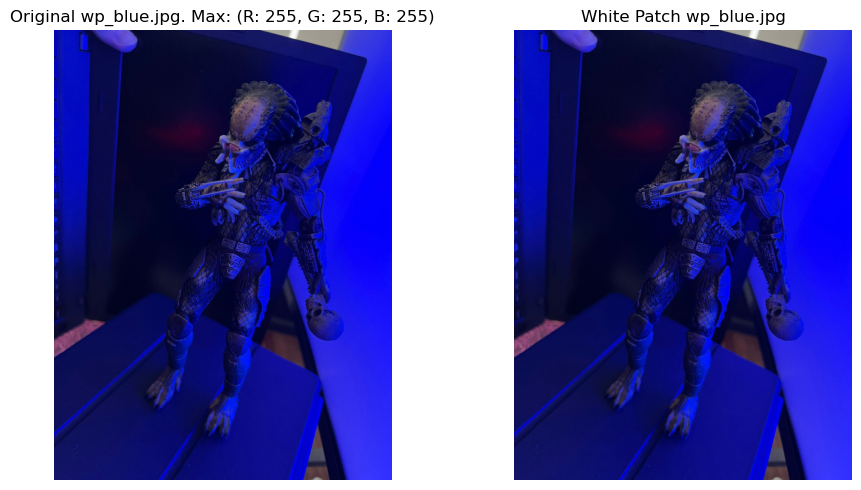

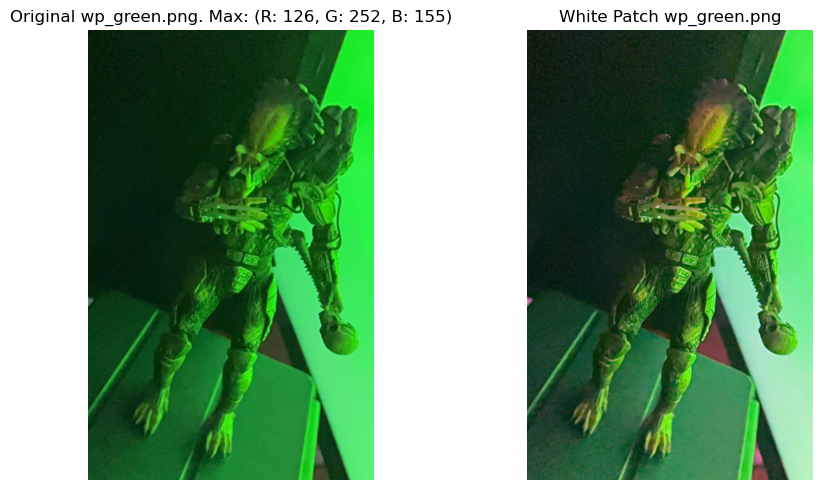

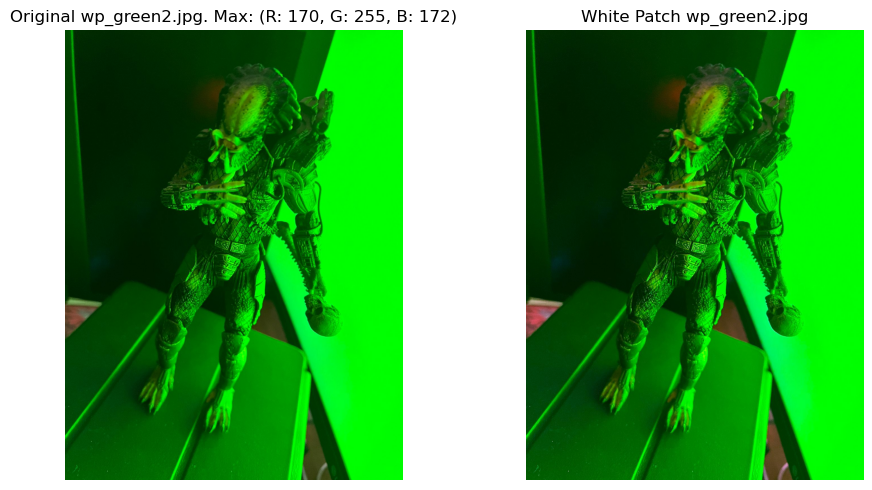

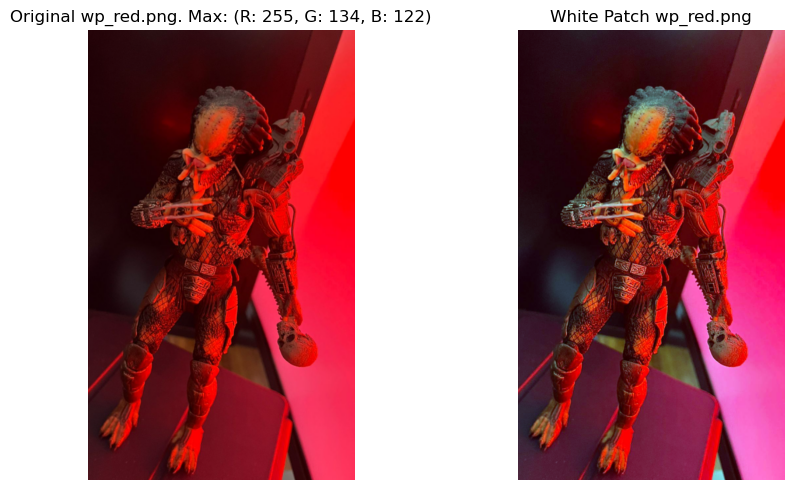

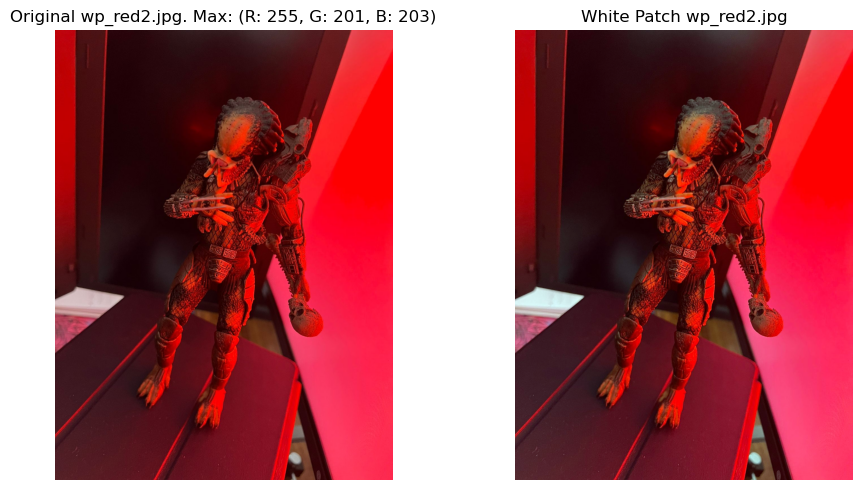

In [3]:
# Cargamos la carpeta de imágenes
image_paths = glob.glob("./white_patch/*.*")

for path in image_paths:
    img = cv2.imread(path, flags=cv2.IMREAD_COLOR_RGB)
    corrected, max_vals = white_patch(img)
    show_images(img, corrected, os.path.basename(path), max_vals)


# 🔍 Análisis de fallas

Entendemos que el método White Patch asume que en cada imagen hay al menos un píxel blanco puro, lo cual no siempre se cumple. Ademas si la imagen esta dominada por algun color especifico, puede ocasionar saturacion de color. Esto trae como consecuencia que en este tipo de imagenes no sea lo mas conveniente aplicar este algoritmo. Podemos verlo en las imagenes que estan saturadas con un color rojo, verde o azul, en ellas se puede observar que el algoritmo no funciona muy bien, Caso contrario, en las imagenes de las manos si se logro unos resultados satisfactorios.

----------------

El problema que encontramos con white patch al aplicarlo en toda la imagen, es que si hay algún pixel cercano al blanco (cercano a 255 en los 3 colores), el máximo de cada color será ese valor y por consiguiente no habrá prácticamente modificación en la imagen original.  
En el caso extremo, donde haya al menos 1 pixel totalmente blanco, el algoritmo no realizará cambios, ya que en los 3 colores el máximo será 255 (dividiendo), que se anula con el 255 (multiplicando).  
Este problema se observa en la imagen wp_blue, donde en el sector superior derecho se visualiza una franja blanca que parece estar detras de la zona iluminada en azul (Esa franja no esta afectada por la misma fuente de luz, pero se ve en el cuadro). Confirmamos esta sospecha al ver los valores máximos en cada canal (255, 255, 255), lo que quiere decir que hay blanco presente en la imagen, por lo cual no habrá cambios al aplicar el algoritmo.  
En wp_red2 ocurre algo similar al caso anterior, donde el piso blanco afecta al algoritmo, no consiguiendo mejorar casi nada la imagen.  
El algoritmo también tiene problemas al trabajar sobre colores puros o casi puros (R, G o B), porque al aplicar la corrección, los colores puros no se ven alterados por el ajuste de los canales que no lo componen (o que lo componen pero en baja proporción).  
La imagen wp_green2 parece tener este problema, el verde se observa bastante puro, y en la imagen modificada, no se observa mejora sobre ese color, aunque si se observan ligeras mejoras sobre los rojos.  
En las imágenes wp_green y wp_red, como hay sectores donde el color dominante es muy claro (hacia el blanco) o muy puro, el efecto que se consigue no es tan bueno, pero se aprecia ligeramente.  
En el caso de las imágenes de las manos, al no haber colores cercanos al blanco, y al tener los fondos una proporción de los 3 canales (donde podría pensarse que hay predominio de un canal), el efecto que se consigue es mucho más marcado, mejorando notablemente las imágenes.

# 🔬 TP1 - Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.  
   Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
   considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

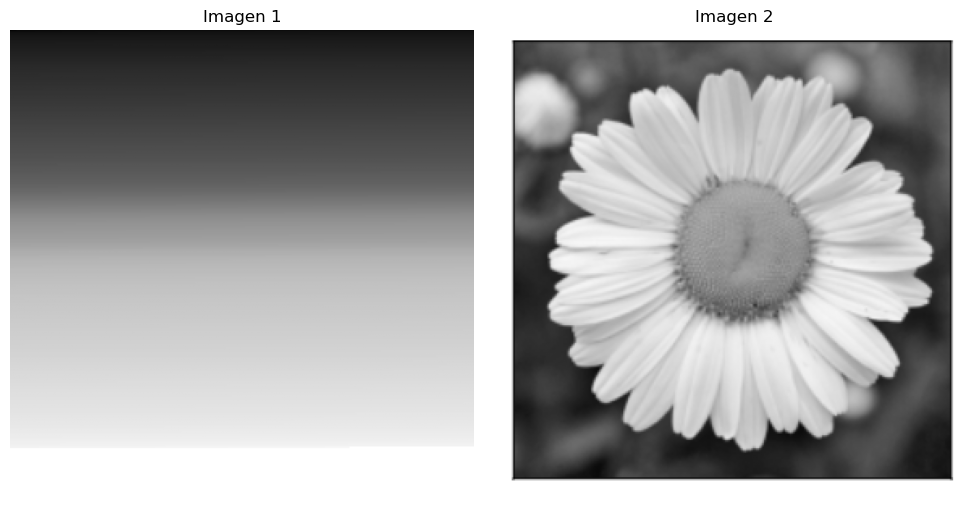

In [4]:
# Leemos las imágenes en escala de grises
img1 = cv2.imread('img/img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img/img2_tp.png', cv2.IMREAD_GRAYSCALE)

# Visualizamos las imágenes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1, cmap='gray')
axs[0].set_title("Imagen 1")
axs[0].axis("off")

axs[1].imshow(img2, cmap='gray')
axs[1].set_title("Imagen 2")
axs[1].axis("off")

plt.tight_layout()
plt.show()


## 📊 Histograma y comparación

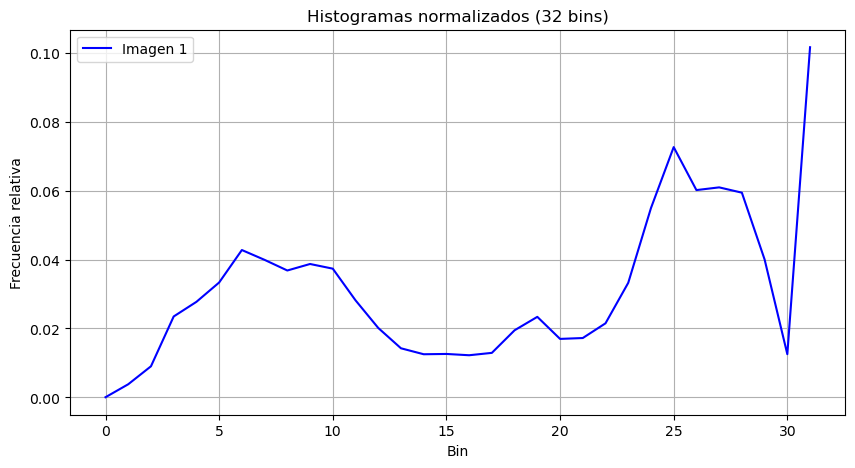

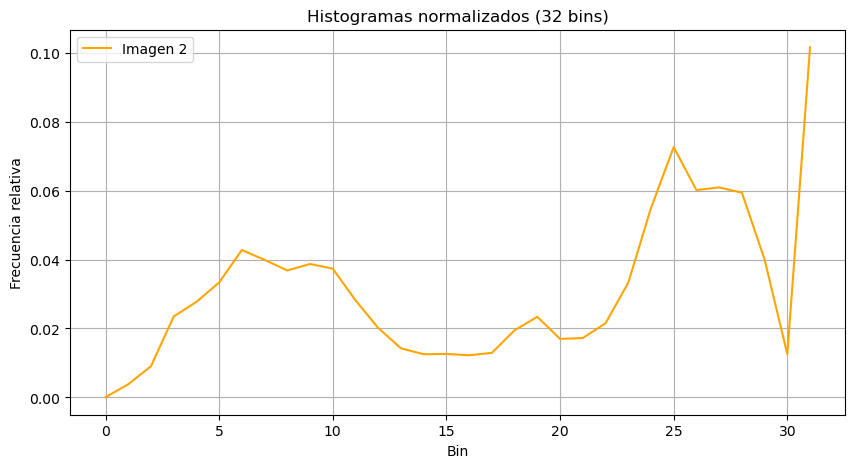

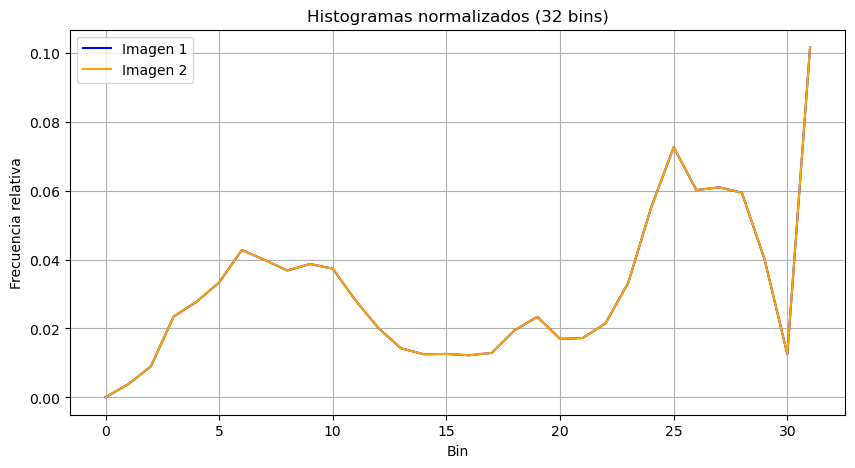

In [5]:
# Elegimos número de bins
bins = 32
range_vals = [0, 256]

# Calculamos los histogramas
hist1 = cv2.calcHist([img1], [0], None, [bins], range_vals)
hist2 = cv2.calcHist([img2], [0], None, [bins], range_vals)

# Normalizamos para comparar en la misma escala
hist1_norm = hist1 / hist1.sum()
hist2_norm = hist2 / hist2.sum()

# Graficamos la imagen 1
plt.figure(figsize=(10, 5))
plt.plot(hist1_norm, label='Imagen 1', color='blue')
#plt.plot(hist2_norm, label='Imagen 2', color='orange')
plt.title("Histogramas normalizados (32 bins)")
plt.xlabel("Bin")
plt.ylabel("Frecuencia relativa")
plt.legend()
plt.grid(True)
plt.show()

# Graficamos la imagen 2
plt.figure(figsize=(10, 5))
#plt.plot(hist1_norm, label='Imagen 1', color='blue')
plt.plot(hist2_norm, label='Imagen 2', color='orange')
plt.title("Histogramas normalizados (32 bins)")
plt.xlabel("Bin")
plt.ylabel("Frecuencia relativa")
plt.legend()
plt.grid(True)
plt.show()

# Graficamos ambas imagenes
plt.figure(figsize=(10, 5))
plt.plot(hist1_norm, label='Imagen 1', color='blue')
plt.plot(hist2_norm, label='Imagen 2', color='orange')
plt.title("Histogramas normalizados (32 bins)")
plt.xlabel("Bin")
plt.ylabel("Frecuencia relativa")
plt.legend()
plt.grid(True)
plt.show()

# 🔍 Observaciones sobre los histogramas

Al comparar los histogramas de img1_tp.png e img2_tp.png, observamos que son prácticamente idénticos. Esto al comienzo nos trajo dudas pero concluimos que ambas imágenes tienen una distribución de intensidades muy similar, incluso si visualmente parecen diferentes.

Creemos que esto es una limitante en los histogramas, ya que no considera la intensidad.
Esto resalta una limitación importante de los histogramas como descriptores de imágenes, ya que no capturan información de intensidad, sino cuántos píxeles tienen cada valor.

#### ¿Sirven los histogramas como features?

Teniendo presente, el problema que observamos en el punto anterior, podemos decir que los histogramas pueden ser utiles como una primera aproximacion. Pero los combinariamos junto con otros features o directamente no utilizarlos. Quizas tambien dependa del contexto si es utili su utilizacion o no.

-----------------

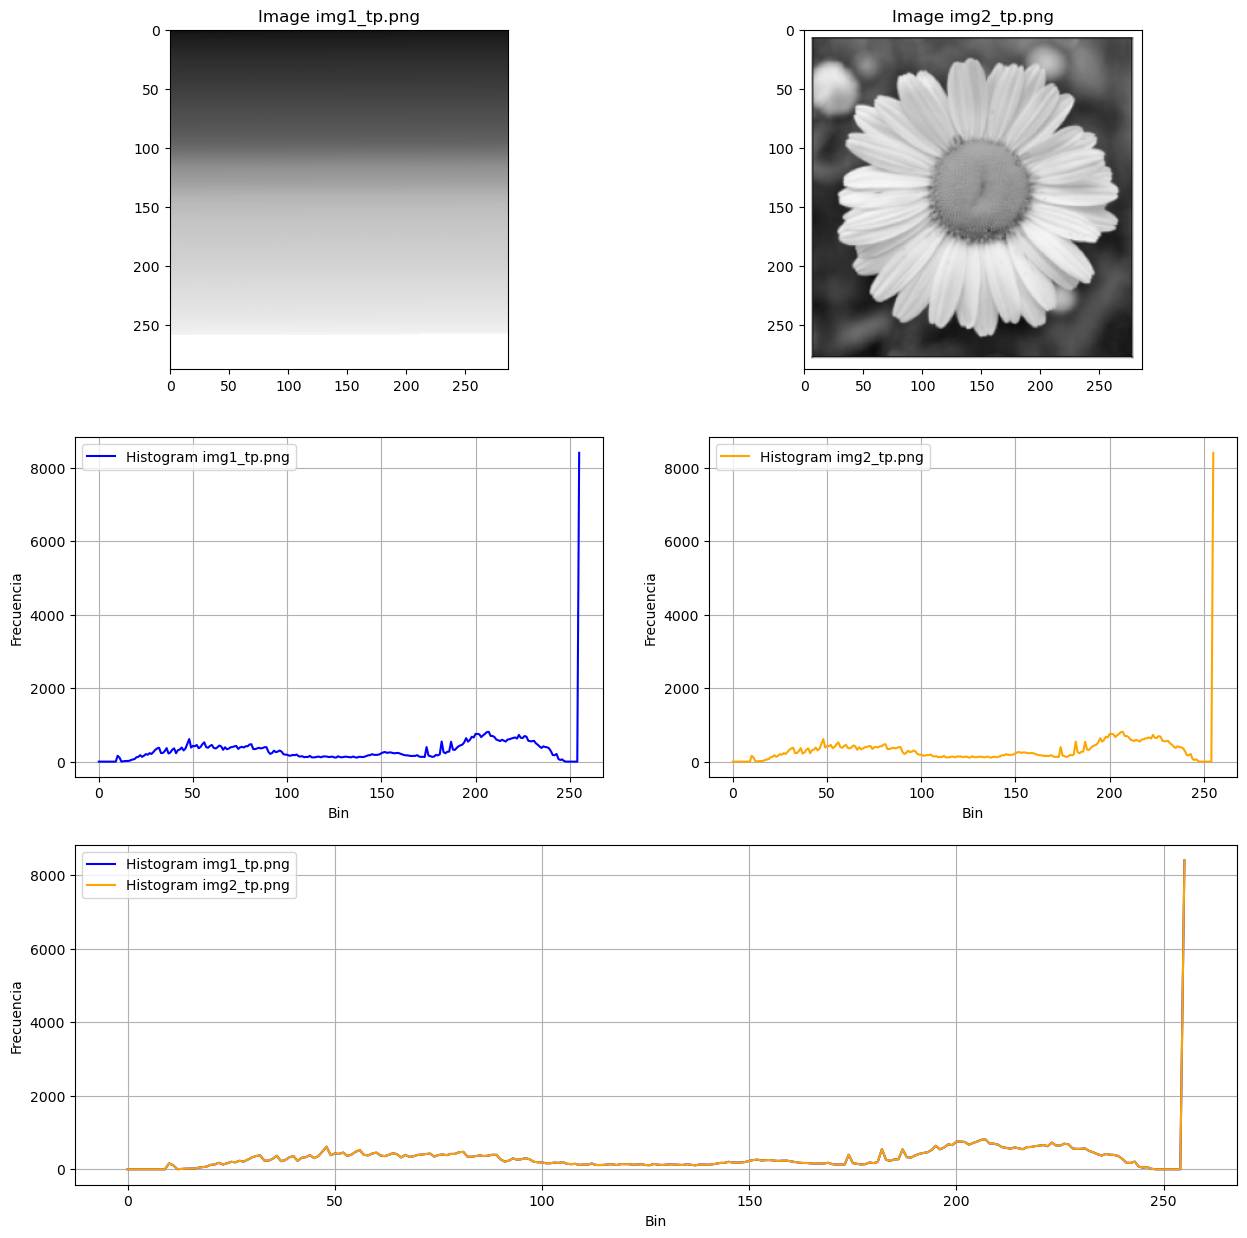

In [6]:
# 256 bins, uno por cada tono de gris (valores posibles del tipo uint8)
bins = 256
range_vals = (0, 255)

images = ["./img/img1_tp.png", "./img/img2_tp.png"]
fig = plt.figure(figsize=(15,15))
axn=plt.subplot(313)
colors = ["blue", "orange"]
x = 0
for img in images:
    # Cargo la imagen
    img_cv = cv2.imread(img, flags=cv2.IMREAD_GRAYSCALE)
    img_name = os.path.basename(img)
    # Muestro la imagen
    ax1=plt.subplot(321+x)
    ax1.imshow(img_cv, cmap='gray', vmin=0, vmax=255)
    ax1.set_title(f'Image {img_name}')
    # Muestro el histograma
    ax2=plt.subplot(323+x)
    hist, _ = np.histogram(img_cv.ravel(),bins,range_vals) 
    ax2.plot(hist, label=f'Histogram {img_name}', color=colors[x%2])
    ax2.set_xlabel("Bin")
    ax2.set_ylabel("Frecuencia")
    ax2.grid(True)
    ax2.legend()
    # Grafico histogramas en un mismo plot
    axn.plot(hist, label=f'Histogram {img_name}', color=colors[x%2])
    x += 1
axn.legend()
axn.set_xlabel("Bin")
axn.set_ylabel("Frecuencia")
axn.grid(True)
plt.show()


# 🔍 Observaciones sobre los histogramas

Lo que observamos es que ambos histogramas son (o parecen al menos) idénticos.  
Confirmamos que son identicos con el último gráfico, donde se superponen completamente.  
Esto quiere decir que ambas imágenes tienen las mismas cantidades de tonos de grises, aunque "repartidas" de distintas formas.  


#### ¿Sirven los histogramas como features?
Consideramos que no sería útil utilizar el histograma en un modelo de clasificación/detección de imágenes, ya que estaríamos clasificando/detectando en función de cantidad de tonos de grises y no de la forma de la imagen u objetos.